In [1]:
from math import sqrt

## Initial Data

In [59]:
#constant
const_pi = 3.1415

#dam profile
B = 46
n = 0.3  #0.1 - 0.5
Ht = 50 #height of triangle profile
H2 = 105.2 - 98 # = 7.2 meters

#section profile
b = 5 #meters
D = 10 #meters
d = 5 #meters

#coast:
Bc = 8 #meters

#reservoir
hw = 0.8 #meters
W_ice = 10000 #in kg / m
h_ice = 1 #in meters
H_allu = 9 #in meters - Alluvium layer thickness

#density
dens_c = 2400 #kg / m**3 - Concrete
dens_w = 1000 #kg / m ** 3 - Water
dens_allu = 1050 #in kg / m ** 3 - Alluvium

#criteria
#sigma_a = 0.1 #MPa
sigma_a = 10000 #kg / m**2

#secondary data
Lw = 11 * hw #in meters
dhw = const_pi * hw ** 2 / Lw #in meters
m = B / Ht - n
dc = hw + dhw + 0.6 #meters
ec = 0.5 #meters

print("in meters:")
print("Dam height (Ht) =", Ht)
print("Dam foot width (B) =", B)
print("(Nakat?) dhw =",dhw)
print("Height above reservoir level (dc) =", dc)
print("m =", m)
print("Lower beef depth (H2) =", H2)

in meters:
Dam height (Ht) = 50
Dam foot width (B) = 46
(Nakat?) dhw = 0.2284727272727273
Height above reservoir level (dc) = 1.6284727272727273
m = 0.6200000000000001
Lower beef depth (H2) = 7.200000000000003


## In one function

In [72]:
def secondary_data():
    Lw = 11 * hw #in meters
    dhw = const_pi * hw ** 2 / Lw #in meters
    m = B / Ht - n
    dc = hw + dhw + 0.6 #meters
    ec = 0.5 #meters

def static_calculation(*, show_winter=False, output, print_all=True):
    
    #geometrical characteristics

    sqrt1n = sqrt(1 + n ** 2)
    a = (D - d) / 2

    F = B * d + a * (2 * b + a * sqrt1n)
    #print("Area (F) =", F)

    x_cm = (0.5 * B ** 2 * d + a * b ** 2 + a ** 2 * (b + a * sqrt1n / 3) * sqrt1n) / F
    #print("x_A (x_cm) =", x_cm)
    x_B = B - x_cm
    #print("x_B =", x_B)

    Jy_list = [0, 0, 0, 0, 0, 0]
    Jy_list[0] = B ** 3 * d / 12
    Jy_list[1] = a * b ** 3 / 6
    Jy_list[2] = a ** 4 / 18 * sqrt1n ** 1.5
    Jy_list[3] = (x_cm - 0.5 * B) ** 2 * B * d
    Jy_list[4] = 2 * (x_cm - 0.5 * b) ** 2 * a * b
    Jy_list[5] = a ** 2 *(x_cm - b - a * sqrt1n / 3) ** 2 * sqrt1n

    Jy = 0
    for item in Jy_list:
        Jy += item
    #print("Jy =", Jy)

    W_A = Jy / x_cm
    W_B = Jy / x_B

    #print("W_A =", W_A)
    #print("W_B =", W_B)

    #LOADS
    #own weight

    #print("in kilograms and kilograms * meters")
    #print("# | G | M")

    G1 = 0.5 * dens_c * B * Ht * d
    M1 = dens_c * Ht * B * d * (B - 3 * x_cm + n * Ht) / 6
    #print("1", G1, M1, sep=" | ")

    G2 = dens_c * Ht * (a * sqrt1n + 2 * b) * a
    M2 = -dens_c * Ht * a * (b * (2 * x_cm - b - n * Ht) + a * sqrt1n * (x_cm - b - n * Ht / 2 - a / 3 * sqrt1n))
    #print("2", G2, M2, sep=" | ")

    G3 = dens_c * Bc * D * dc
    M3 = -G3 * (x_cm * n * Ht - ec)
    #print("3", G3, M3, sep=" | ")

    a1 = (0.5 * Bc - ec)
    G4 = 0.5 * dens_c * D * a1 ** 2 / n
    M4 = -G4 * (x_cm - n * Ht + 2 * a1 / 3)
    #print("4", G4, M4, sep=" | ")

    a2 = (0.5 * Bc - ec)
    G5 = -0.5 * dens_c * n * D * a2 ** 2 / m ** 2
    M5 = G5 * (x_cm - b - n * Ht + 2 * n * a2 / 3 / m)
    #print("5", G5, M5, sep=" | ")

    a_star = a2 * (b + a * sqrt1n) * sqrt1n / m / b
    b_star = x_cm - b - n * Ht - a * sqrt1n
    n1 = (1 - n * m) / (n + m)
    G6 = -dens_c * a ** 2 * (a_star - 2 * a * (1 + n ** 2) * Ht / 3 / B)
    M6_1 = a_star * (b_star + n * a / 2 + 2 * a / 3 / sqrt1n)
    M6_2_2 = n * (2 + n ** 2) / sqrt1n + n1 * (2 - n ** 2) / (sqrt(1 + n1 ** 2))
    M6_2 = -2/3 * a *(n * n1 * a_star + (n + n1) * b_star + 3 / 8 * M6_2_2 * a)
    M6 = dens_c * a ** 2 * (M6_1 + M6_2)
    #print("6", G6, M6, sep=" | ")

    #water pressure

    #print("Upper beef: ")
    #print("W | M")
    #upper horizontal
    H1 = Ht
    W_uphor = 0.5 * dens_w * H1 ** 2 * D
    M_uphor = dens_w * H1 ** 3 * D / 6
    #print(W_uphor, M_uphor, sep=" | ")

    #upper vertical
    W_upvert = n * W_uphor
    M_upvert = - dens_w * n * D * H1 ** 2 * (3 * x_cm - n * H1) / 6
    #print(W_upvert, M_upvert, sep=" | ")

    #print("Lower beef: ")
    #print("W | M")
    #lower horizontal
    W_lowhor = -0.5 * dens_w * H2 ** 2 * D
    M_lowhor = W_lowhor * H2 / 3
    #print(W_lowhor, M_lowhor, sep=" | ")

    #lower vertical
    W_lowvert = (n - B * d / Ht / D) * W_lowhor
    M_lowvert_1 = 2 * n * a * (x_cm - b - a / 2 - n * H2 / 3)
    M_lowvert_2 = m * (x_B - m * H2 / 3) * d
    M_lowvert = (M_lowvert_1 + M_lowvert_2) * W_lowhor / D
    #print(W_lowvert, M_lowvert, sep=" | ")

    #filtering pressure

    U1 = -dens_w * H2 * (D * b + a * (D + d) / 2 + (B - b - a) * d)
    M_U1 = 0
    U2 = -dens_w * (H1 - H2) * (b + a) * D
    M_U2 = -U2 * (x_cm - (b + a) / 2)

    #print("# | U | M")
    #print("1", U1, M_U1, sep=" | ")
    #print("2", U2, M_U2, sep=" | ")

    #alluvium pressure

    W_alluhor = 0.5 * dens_allu * H_allu ** 2 * D
    M_alluhor = W_alluhor * H_allu / 3

    W_alluvert = 0.5 * dens_allu * n * H_allu ** 2 * D
    M_alluvert = -W_alluvert *  (x_cm - n * H_allu / 3)

    #print("W | M")
    #print("horizontal part")
    #print(W_alluhor, M_alluhor, sep=" | ")
    #print("vertical part")
    #print(W_alluvert, M_alluvert, sep=" | ")

    #wave pressure

    W_wavhor = dens_w * hw * (Lw / const_pi + hw / 2) * D / 2
    M_wavhor = W_wavhor * (H1 - Lw / 2 / const_pi + 3 * hw / 8)

    W_wavvert = W_wavhor * n

    #print("wave pressure:")
    #print("horizontal part")
    #print("W | M")
    #print(W_wavhor, M_wavhor, sep=" | ")
    #print("vertical part:")
    #print("W")
    #print(W_wavvert)
    #print()

    #ice pressure

    M_ice = W_ice * (H1 - 0.45 * h_ice)
    #print("ice pressure: W | M")
    #print(W_ice, M_ice, sep=" | ")
    #print()

    #summary

    N = G1 + G2 + G3 + G4 + G5 + G6 + W_upvert + W_lowvert + U1 + U2 + W_wavvert + W_alluvert
    Qsummer = W_uphor + W_lowhor + W_alluhor + W_wavhor
    Qwinter = W_uphor + W_lowhor + W_alluhor + W_ice
    Msummer = M1 + M2 + M3 + M4 + M5 + M6 + M_uphor + M_lowhor + M_upvert + M_lowvert + M_U2 + M_alluhor + M_alluvert + M_wavhor
    Mwinter = M1 + M2 + M3 + M4 + M5 + M6 + M_uphor + M_lowhor + M_upvert + M_lowvert + M_U2 + M_alluhor + M_alluvert + M_ice

    #stretching stress criteria
    stretch = sigma_a * B ** 2 - N * B + 6 * Msummer
    
    if print_all == True:
        print("B =", B, end=", ")
        print("Ht =", Ht, end=", ")
        print("n =", n)
        print("N =", N, "kg")
        print("Qsummer =", Qsummer, "kg", "Msummer =" , Msummer, "kg * m", sep=" | ")
        if show_winter == True:
            print("Qwinter =", Qwinter, "kg", "Mwinter =" , Mwinter, "kg * m", sep=" | ")
        print()
        print("Stretching stress criteria (must be close to 0) =", stretch)
        
    if output == "Msummer":
        return Msummer
    if output == "Qsummer":
        return Qsummer
    if output == "N":
        return N
    if output == "stretch":
        return stretch

## Optimal profile

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
B = 46
n = 0.3
Ht = 50
secondary_data()
static_calculation(show_winter=False, output="Msummer")

B = 46, Ht = 50, n = 0.3
N = 16997918.50818722 kg
Qsummer = | 12678854.838452969 | kg | Msummer = | 58200772.108187325 | kg * m

Stretching stress criteria (must be 0) = -221099618.7274881


58200772.108187325

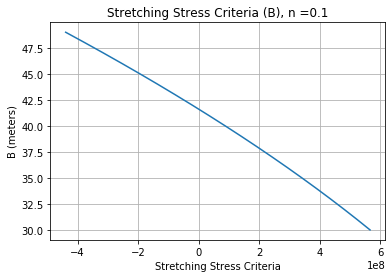

In [74]:
B = 46
n = 0.1
stretch_list = []
B_list = []

B = 30

for i in range(20):
    secondary_data()
    B_list.append(B)
    stretch_list.append(static_calculation(show_winter=False, output="stretch", print_all=False))
    B += 1

fig, ax = plt.subplots()
ax.plot(stretch_list, B_list)
#ax.ticklabel_format(style = 'plain')

ax.set(xlabel='Stretching Stress Criteria', ylabel='B (meters)',
       title='Stretching Stress Criteria (B), n ='+str(n))
ax.grid()

#fig.savefig("test.png")
plt.show()

#for i in range(len(B_list)):
    #print(stretch_list[i], B_list[i], sep=" | ")

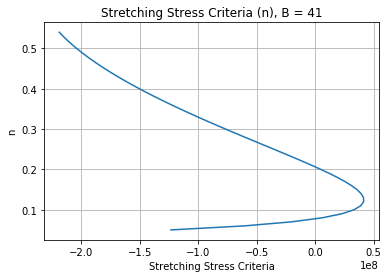

In [70]:
B = 41
n = 0.3
stretch_list = []
n_list = []

n = 0.05
for i in range(50):
    secondary_data()
    n_list.append(n)
    stretch_list.append(static_calculation(show_winter=False, output="stretch", print_all=False))
    n += 0.01

fig, ax = plt.subplots()
ax.plot(stretch_list, n_list)
#ax.ticklabel_format(style = 'plain')

ax.set(xlabel='Stretching Stress Criteria', ylabel='n',
       title='Stretching Stress Criteria (n), B = '+str(B))
ax.grid()

#fig.savefig("test.png")
plt.show()

## B = 41 m
## n = 0.2

In [73]:
B = 41
n = 0.2
secondary_data()
static_calculation(show_winter=True, output=None, print_all=True)

B = 41, Ht = 50, n = 0.2
N = 14668400.524259314 kg
Qsummer = | 12678854.838452969 | kg | Msummer = | 98246745.80240181 | kg * m
Qwinter = | 12676050.0 | kg | Mwinter = | 98116096.94650273 | kg * m

Stretching stress criteria (must be close to 0) = 4886053.319779038
